This notebook demonstrates how to use the `SVM` class to utilize the sediment velocity model (SVM) proposed by [Shi and Asimaki (2018)](https://pubs.geoscienceworld.org/ssa/srl/article/89/4/1397/531239/a-generic-velocity-profile-for-basin-sediments-in). The full documentation of all the attributes and methods of this class is [here](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_svm.html).

_The whole notebook takes about 30 minutes to read through._

# 1. What does the SVM do?

The sediment velocity model (SVM) can produce a realistic shear-wave velocity ($V_S$) profile at a site, given the $V_{S30}$ value at that site. The model parameters are calibrated using measured data in California, so is quite credible for predicting site conditions in California. For more details, see [Shi and Asimaki (2018)](https://pubs.geoscienceworld.org/ssa/srl/article/89/4/1397/531239/a-generic-velocity-profile-for-basin-sediments-in).

(The acceptable range of $V_{S30}$ for the SVM is 173.1 m/s to 1,000 m/s.)

# 2. Import relevant libraries

In [1]:
from PySeismoSoil.class_svm import SVM

# 3. Initialize an `SVM` object

## 3.1. The easiest way

The only information needed is the $V_{S30}$ value.

In [2]:
Vs30 = 320  # unit: m/s
svm_0 = SVM(Vs30)

You can use the `plot()` method to view the "base" profile, which comes from an analytical formula and thus appears "smooth":

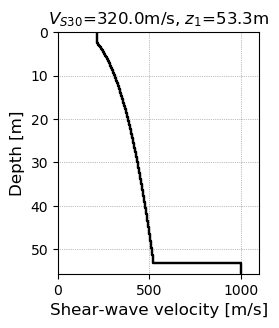

In [3]:
svm_0.plot();

Note that (in the figure above), an `SVM` object named "`svm_0`" is initialized with a $z_1$ (basin depth, or depth to 1 km/s) of 53.3 m. This $z_1$ value is automatically calculated using the following empirical formula:
$$z_{1}=140.511\exp\left(-0.00303V_{S30}\right)$$
This formula comes from the data used in [Shi and Asimaki (2018)](https://pubs.geoscienceworld.org/ssa/srl/article/89/4/1397/531239/a-generic-velocity-profile-for-basin-sediments-in), and is also documented in Shi (2019).

## 3.2. Providing known $z_1$ information

Alternatively, if the users know $z_1$, they can also provide it. The SVM $V_S$ profile will be truncated at the depth of $z_1$, and "glued" to a 1 km/s bedrock:

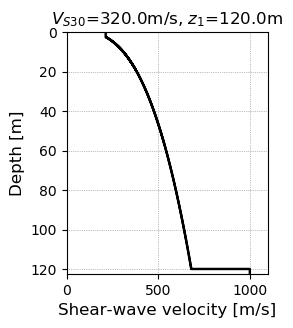

In [4]:
svm_1 = SVM(Vs30, z1=120)
svm_1.plot();

## 3.3. Very deep basin depths

If the provided $z_1$ is very deep for the provided $V_{S30}$, the $V_S$ values will be replaced with a linear interpolation from 0.9 km/s to 1 km/s:

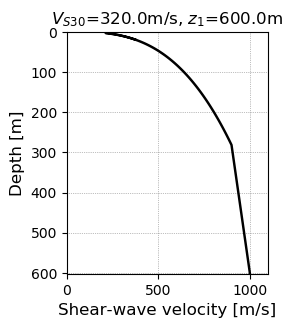

In [5]:
svm_2 = SVM(Vs30, z1=600)
svm_2.plot();

Note that $z_1$ only changes how the $V_S$ profile terminates, not the $V_S$ trend above the bedrock:

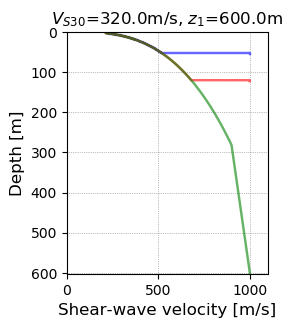

In [6]:
fig, ax, _ = svm_0.plot(c='blue', alpha=0.6)
svm_1.plot(fig=fig, ax=ax, c='red', alpha=0.6)
svm_2.plot(fig=fig, ax=ax, c='green', alpha=0.6);

## 3.4. Advanced ways of initializing an object (_optional_)

If necessary, advanced users (who know the details of the SVM well) can initialize customized `SVM` objects. Here is an example:

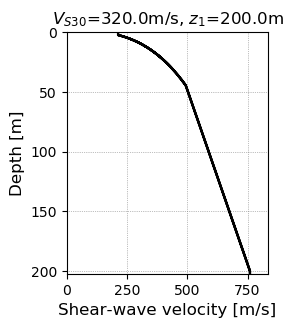

In [7]:
# use 760 m/s as bedrock; start "linear interpolation" at 65% of 760 m/s:
svm_3 = SVM(Vs30, z1=200, Vs_cap=760, eta=0.65)
svm_3.plot();

# 4. Manipulating an `SVM` object

## 4.1. Get "base $V_S$ profiles"

You can access the "base $V_S$ profile" as a `Vs_Profile` object ([documentation](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_Vs_profile.html), [examples](./Demo_02_Vs_Profile.ipynb)):

In [8]:
base_profile_0 = svm_0.base_profile
type(base_profile_0)

PySeismoSoil.class_Vs_profile.Vs_Profile

The "base $V_S$ profile" has a layer discretization of 0.1 m (except for the top 2.5 m). Below is a demonstration of the top few layers:

In [9]:
print(str(base_profile_0)[:630])


----------+----------+-------------+------------------+--------------
  Thk [m] | Vs [m/s] | Damping [%] | Density [kg/m^3] | Material No. 
----------+----------+-------------+------------------+--------------
   2.40   |  213.1   |    3.911    |      1800.0      |      1       
   0.10   |  213.1   |    3.911    |      1800.0      |      2       
   0.10   |  215.0   |    3.876    |      1800.0      |      3       
   0.10   |  216.9   |    3.842    |      1800.0      |      4       
   0.10   |  218.8   |    3.809    |      1800.0      |      5       
   0.10   |  220.6   |    3.777    |      1800.0      |      6       


## 4.2. Get discretized $V_S$ profiles

In practice, we usually use a more coarse layering. We can achieve that in this way:


----------+----------+-------------+------------------+--------------
  Thk [m] | Vs [m/s] | Damping [%] | Density [kg/m^3] | Material No. 
----------+----------+-------------+------------------+--------------
   8.00   |  239.1   |    3.486    |      1800.0      |      1       
   8.00   |  327.3   |    2.546    |      1800.0      |      2       
   8.00   |  382.1   |    2.181    |      1800.0      |      3       
   8.00   |  424.9   |    1.961    |      1800.0      |      4       
   8.00   |  460.4   |    1.810    |      1800.0      |      5       
   8.00   |  491.1   |    1.697    |      1800.0      |      6       
   5.29   |  518.3   |    1.608    |      1800.0      |      7       
   0.00   |  1000.0  |    0.833    |      2000.0      |      0       
----------+----------+-------------+------------------+--------------

(Vs30 = 322.7 m/s)

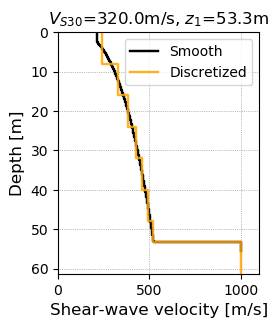

In [10]:
svm_0.get_discretized_profile(fixed_thk=8.0, show_fig=True)  # use a fixed layer thickness of 8.0 m


----------+----------+-------------+------------------+--------------
  Thk [m] | Vs [m/s] | Damping [%] | Density [kg/m^3] | Material No. 
----------+----------+-------------+------------------+--------------
   5.80   |  220.6   |    3.777    |      1800.0      |      1       
   4.70   |  291.5   |    2.859    |      1800.0      |      2       
   6.50   |  340.6   |    2.446    |      1800.0      |      3       
   8.70   |  390.3   |    2.135    |      1800.0      |      4       
  11.00   |  440.2   |    1.893    |      1800.0      |      5       
  13.80   |  490.0   |    1.701    |      1800.0      |      6       
   2.70   |  517.9   |    1.609    |      1800.0      |      7       
   0.09   |  517.9   |    1.609    |      1800.0      |      8       
   0.00   |  1000.0  |    0.833    |      2000.0      |      0       
----------+----------+-------------+------------------+--------------

(Vs30 = 320.7 m/s)

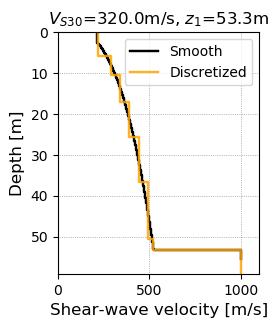

In [11]:
svm_0.get_discretized_profile(Vs_increment=50, show_fig=True)  # create a layer for every ~50 m/s Vs increment

## 4.3. Get stochastic $V_S$ profiles

We can also get stochastic (or "randomized") profiles that better reflect the real-world situations.

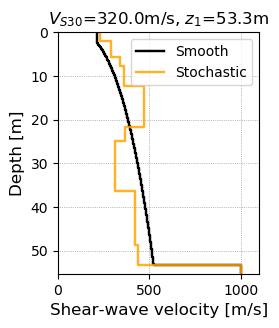

In [12]:
svm_0.get_randomized_profile(seed=10, show_fig=True);

Different seeds give different randomization:

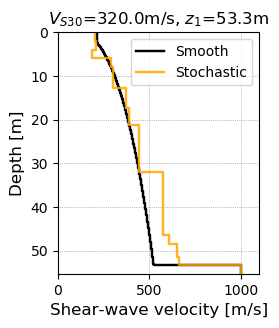

In [13]:
svm_0.get_randomized_profile(seed=11, show_fig=True);

Sometimes, the resultant $V_{S30}$ and $z_1$ of the randomized profile may be quite different from the user-specified $V_{S30}$ and/or $z_1$. To address this issue, set `vs30_z1_compliance` to `True`, and PySeismoSoil will keep generating randomized profile until there is a profile that satisfies these following criteria:

1. The absolute difference between the randomized and target $V_{S30}$ is < 25 m/s;
2. The relative difference (between the randomized profile and the base profile) of the last soil layer’s $V_S$ is < 5%;
3. The relative difference of the randomized and target $z_1$ is < 20%.

Iterating for compliant Vs profile:
.......


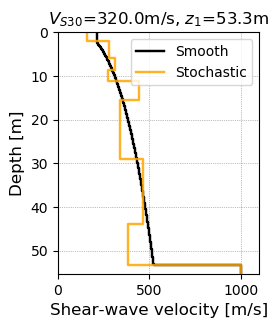

In [14]:
svm_0.get_randomized_profile(seed=12, show_fig=True, vs30_z1_compliance=True, verbose=True);

# 5. Example of populating a 2D velocity cross section

In this example, we will generate an artificial 2D velocity cross section, and replace the materials of $V_S \leqslant 1,000~\mathrm{m/s}$ with SVM-generated profiles.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

## 5.1. Define the geometry of the cross section

In [16]:
start_lat = 33.8
end_lat = 34.0

n_profile = 500  # number of 1D Vs profile along the 2D cross section
lat_array = np.linspace(start_lat, end_lat, n_profile)

## 5.2. Load $z_1$ values along the cross section

In [17]:
z1_contour = np.genfromtxt('./files/z1_contour.txt')

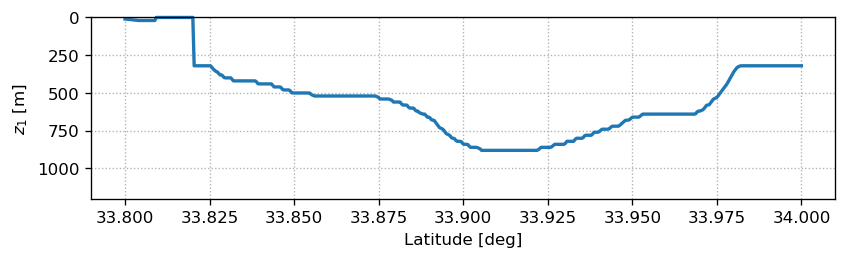

In [18]:
plt.figure(figsize=(8, 2), dpi=120)
plt.plot(lat_array, z1_contour, lw=2.0, clip_on=False)
plt.grid(ls=':')
plt.xlabel('Latitude [deg]')
plt.ylabel('$z_1$ [m]')
plt.ylim(1200, 0);

## 5.3. Generate an artificial 2D $V_S$ profile

Assume $V_S$ starts from 0 m/s at the ground surface, and linearly increases to 1,000 m/s at $z_1$, and keeps increasing at the same rate beyond $z_1$, until reaching 2,000 m/s. (Of course, this is **not** a realistic case.)

In [19]:
n_depth = 1200  # number of soil layers
fixed_thickness = 1.0  # fixed layer thickness
z_total = fixed_thickness * n_depth # total depth of the 2D cross section: 1200.0 m
z_array = np.linspace(0, z_total, num=n_depth)

original_2D_profile = np.zeros((n_depth, n_profile))  # rows: depth; columns: 1D profiles along cross section

for j in range(n_profile):  # populate each profile one by one
    if z1_contour[j] == 0:
        raw_vs_profile = 1500.0 * np.ones_like(z_array)  # use a constant rock velocity (1,500 m/s)
    else:
        raw_vs_profile = np.minimum(2000, (1000.0 / z1_contour[j]) * z_array)
    original_2D_profile[:, j] = raw_vs_profile

Define a subroutine to plot 2D velocity profiles:

In [20]:
def plot_2D_profile(*, Vs_data, depth_array, latitude_array):
    '''
    Plot a 2D cross section of Vs profiles.

    Parameters
    ----------
    Vs_data : numpy.ndarray
        Vs data of the cross section. It should be a 2D numpy array, with its rows
        being different depths, and columns being different 1D Vs profiles
        (along the horizontal location).
    depth_array : numpy.ndarray
        An array of layer depths. Its length should be the same as the number of 
        rows of ``Vs_data``.
    latitude_array : numpy.ndarray
        The array of latitude values. Its length should be the same as the number
        of columns of ``Vs_data``.
        
    Returns
    -------
    fig : matplotlib.figure.Figure
        Figure object
    ax : matplotlib.axes._subplots.AxesSubplot
        Axes object
    '''
    n_depth, n_profile = Vs_data.shape
    assert(len(latitude_array) == n_profile)
    assert(len(depth_array) == n_depth)

    X = np.zeros((n_profile, n_depth))
    Y = np.zeros((n_profile, n_depth))
    Z = np.zeros((n_profile, n_depth))
    for i in range(n_profile):
        for j in range(n_depth):
            X[i][j] = depth_array[j]  # depth
            Y[i][j] = lat_array[i]  # latitude
            Z[i][j] = Vs_data[j, i]  # Vs value

    #------------ Step 3: Plotting --------------------------------------
    fig = plt.figure(dpi=120)
    ax = plt.axes()
    hcon = plt.contourf(Y, X, Z, 80)
    plt.xlabel('Latitude [deg]')
    plt.ylabel('Depth [m]')
    plt.gca().invert_yaxis()
    plt.set_cmap('jet_r')
    hcb = plt.colorbar(hcon)
    hcb.ax.set_ylabel('$V_S$ [m/s]')

    return fig, ax

Plot this artificial 2D profile:

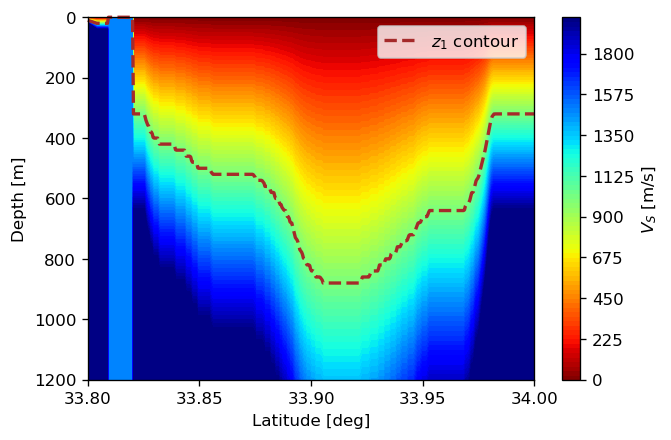

In [21]:
fig, ax = plot_2D_profile(Vs_data=original_2D_profile, depth_array=z_array, latitude_array=lat_array)
ax.plot(lat_array, z1_contour, lw=2.0, clip_on=False, color='brown', ls='--', label='$z_1$ contour');
ax.legend(loc='upper right');

## 5.4. Replace the basin material with SVM-generated $V_S$ values

First of all, get an array of $V_{S30}$ values. Assume that they come from a credible source (such as a $V_{S30}$ map).

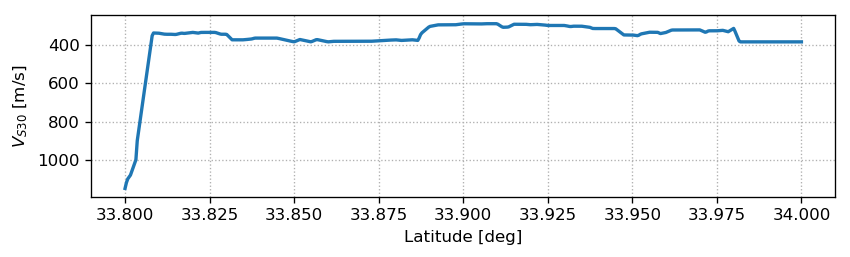

In [22]:
vs30_contour = np.genfromtxt('./files/vs30_contour.txt')

plt.figure(figsize=(8, 2), dpi=120)
plt.plot(lat_array, vs30_contour, lw=2.0, clip_on=False)
plt.grid(ls=':')
plt.xlabel('Latitude [deg]')
plt.ylabel('$V_{S30}$ [m/s]')
plt.gca().invert_yaxis()

Then, define two functions to replace the original $V_S$ value with SVM-generated $V_S$ values:

In [23]:
def replace_2D_profile(original_2D_profile, vs30_contour, z1_contour, stochastic=False):
    '''
    Replace Vs values in ``original_2D_profile`` (above z1) with SVM-generated Vs values.
    
    Parameters
    ----------
    original_2D_profile : numpy.ndarray
        Vs data of the 2D profile. It should be a 2D numpy array, with its rows
        being different depths, and columns being different 1D Vs profiles 
        (along the horizontal location).
    vs30_contour : numpy.ndarray
        The contour of Vs30 values along the horizontal location. It should be
        a 1D numpy array.
    z1_contour : numpy.ndarray
        The contour of z1 values along the horizontal location. It should be
        a 1D numpy array.
    stochastic : bool
        Whether to use stochastic SVM profiles to replace the original 2D 
        profile. (Otherwise, use the base SVM profiles.)
    
    Returns
    -------
    new_2D_profile : numpy.array
        The new 2D profile. It should have the same shape as ``original_2D_profile``.
    '''
    import PySeismoSoil.helper_site_response as sr
    
    new_2D_profile = np.zeros((n_depth, n_profile))
    for j in range(n_profile):
        vs30 = vs30_contour[j]
        z1 = z1_contour[j]
        
        if vs30 >= 1000:  # rock site: no replacement needed
            new_2D_profile[:, j] = original_2D_profile[:, j]
        else:  # soil site: replace original Vs with SVM-generated Vs
            if z1 == 0:  # z1 from original 2D profile is inaccurate
                z1 = sr.calc_z1_from_Vs30(vs30_contour[j])  # infer z1 from Vs30

            svm = SVM(vs30, z1=z1)  # an `SVM` object
            svm_profile = svm.get_discretized_profile(fixed_thk=fixed_thickness)  # a `Vs_Profile` object
            vs_matrix = svm_profile.vs_profile  # a 2D numpy array ("matrix") with 5 columns
            svm_vs_values = vs_matrix[:, 1]  # extract the 1st column
            
            original_Vs = original_2D_profile[:, j]
            new_2D_profile[:, j] = replace_1D_profile(original_Vs, svm_vs_values, int(z1 / fixed_thickness))
        # END IF
    # END FOR
    
    return new_2D_profile

In [24]:
def replace_1D_profile(original_profile, svm_profile, z1_index):
    '''
    Replace the content of ``original_profile`` with that of ``svm_profile``,
    from the ground surface (index 0) down to ``z1_index``.
    
    Parameters
    ----------
    original_profile : numpy.ndarray
        1D numpy array of original Vs values to be replaced
    new_profile : numpy.ndarray
        1D numpy array of Vs values generated by the SVM. Its length 
        needs to be no shorter than ``z1_index``.
    z1_index : int
        The 0th to the ``z1_index``-th elements of ``original_profile``
        will be replaced with those from the ``svm_profile``. And the 
        elements beyond ``z1_index`` in the ``original_profile`` will
        remain unchanged.
    
    Returns
    -------
    new_profile : numpy.ndarray
        The new Vs values.
    '''
    assert(len(svm_profile) >= z1_index)
    new_profile = original_profile.copy()
    new_profile[:z1_index] = svm_profile[:z1_index]
    return new_profile

Next, for each of the 500 raw 1D profiles, replace the $V_S$ values above the $z_1$ contour with SVM profiles:

In [25]:
new_2D_profile = replace_2D_profile(original_2D_profile, vs30_contour, z1_contour)

View the new 2D cross section:

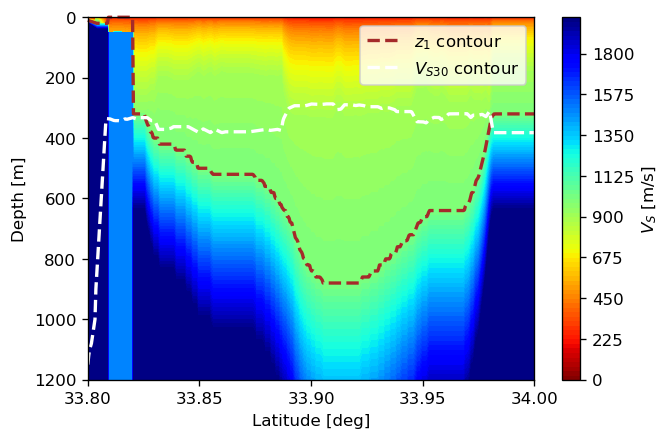

In [26]:
fig, ax = plot_2D_profile(Vs_data=new_2D_profile, depth_array=z_array, latitude_array=lat_array)
ax.plot(lat_array, z1_contour, lw=2.0, clip_on=False, color='brown', ls='--', label='$z_1$ contour')
ax.plot(lat_array, vs30_contour, lw=2.0, color='white', ls='--', label='$V_{S30}$ contour')
ax.legend(loc='upper right');